In [ ]:
**This graph is a comparision be 1985-2015**

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Any results you write to the current directory are saved as output. Jub Jub

In [11]:
fpen1 = mpl.font_manager.FontProperties(family='Bahnschrift',size=20) #ฟอนต์ eng Bahnschrift เท่กว่าดั้งเดิม โดยใช้ command >>fontproperties=fpen1<< ใน plt
fpen2 = mpl.font_manager.FontProperties(family='Consolas',size=20) #ฟอนต์ eng Consolas เท่กว่าดั้งเดิม โดยใช้ command >>fontproperties=fpen2<< ใน plt
fpth = mpl.font_manager.FontProperties(family='JasmineUPC',size=20) #ใส่ฟอนต์ไทย JasmineUPC เผื่ออยากใช้ภาษาไทยในกราฟต่างๆ โดยใช้ command >>fontfroperties=fpth<< ใน plt (ฟอนต์อื่นๆตามเว็บไม่รองรับ ฮืออออ)

In [18]:
dataset = pd.read_csv('https://raw.githubusercontent.com/artist0123/ProjectPSIT/main/master.csv', engine = 'python', sep = ',')

In [19]:
dataset.head()

,Country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [21]:
unique_country = dataset['Country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

**This graph is a comparision by year.**

Text(0.5, 0.91, 'Worldwide Suicide (1985 - 2015)')

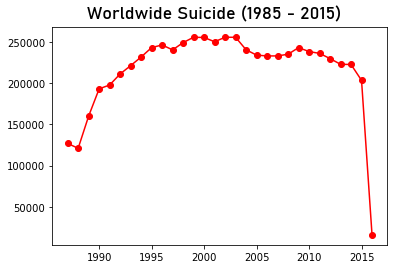

In [22]:
data_year = dataset[dataset.year >= 1987].groupby('year').sum()
plt.plot(data_year.index, data_year['suicides_no'], 'ro-')
plt.figtext(.5,.91,'Worldwide Suicide (1985 - 2015)', color='black', fontproperties=fpen1,  fontsize=18, ha='center')

**This graph is a suicide divide by a gender.**

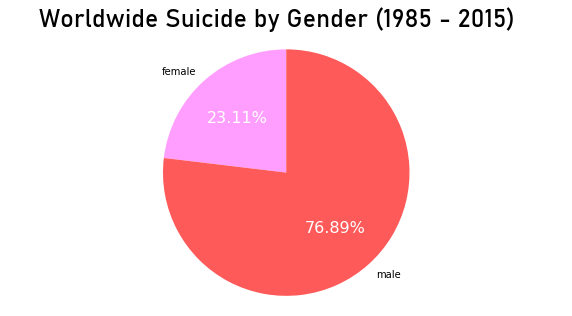

In [23]:
data_grp_mf = dataset.groupby(by=['sex']).agg({"suicides_no": ['sum']})
data_grp_mf.columns = ['total_suicide']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['total_suicide'], labels=data_grp_mf['sex'], autopct='%1.2f%%', startangle=90, colors=['#ff9eff', '#ff5a5a'])
ax1.axis('equal')

plt.setp(autotexts, size=16, color="w")
plt.figtext(.5,.91,'Worldwide Suicide by Gender (1985 - 2015)', color='black', fontproperties=fpen1, fontsize=25, ha='center')
plt.show()

#ref https://www.kaggle.com/snanilim/hey-you-suicide-is-not-a-solution

**This graph is a suicide between age and gender.**

Text(0.5, 0.91, 'Worldwide Suicide by Age and Gender (1985 - 2015)')

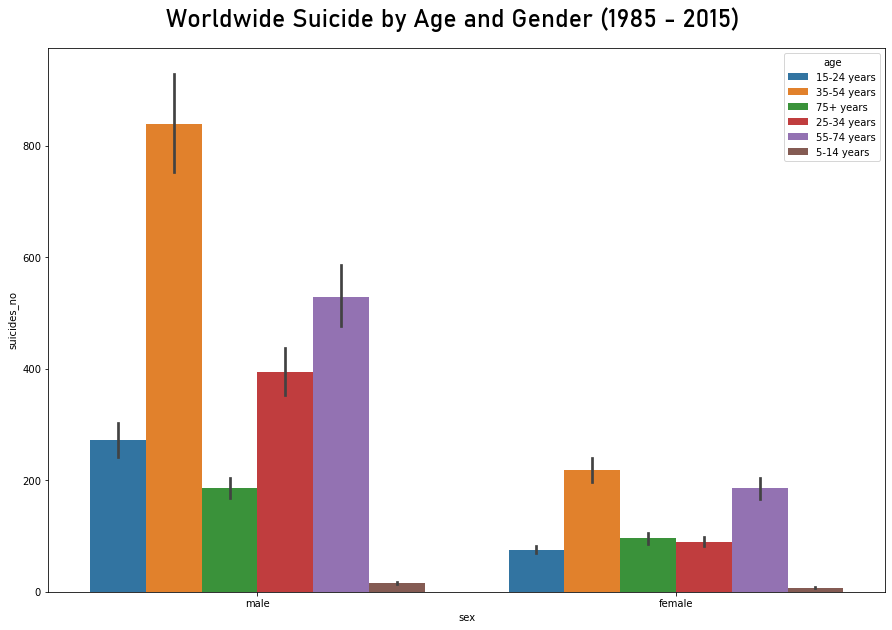

In [36]:
### Set figure size
plt.figure(figsize=(15,10))
###Let's plot the barplot
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age', data = dataset)
plt.figtext(.5,.91,'Worldwide Suicide by Age and Gender (1985 - 2015)', color='black', fontproperties=fpen1, fontsize=25, ha='center')
#ref by https://www.kaggle.com/spidy20/suicide-data-visualization-beginner-guide

**This graph is a suicide divide by a generation.**

Text(0.5, 0.91, 'Worldwide Suicide by Generation (1985 - 2015)')

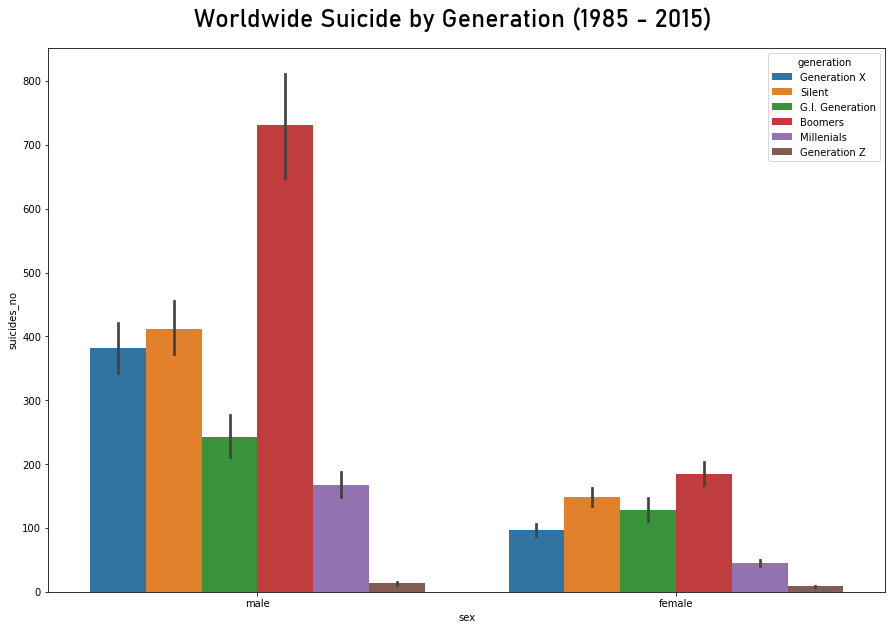

In [34]:
plt.figure(figsize=(15,10))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)
plt.figtext(.5,.91,'Worldwide Suicide by Generation (1985 - 2015)', color='black', fontproperties=fpen1, fontsize=25, ha='center')
#เอา

#G.I. คนกลุ่มนี้เกิดในช่วงปี พ.ศ. 2444-2467 คือยุคก่อนสงครามโลกครั้งที่ 2 พวกเขาจึงกลายมาเป็นกำลังหลักของการต่อสู้ในช่วงสงครามโลกครั้งที่ 2
#Silent หมายถึงคนที่เกิดในช่วง พ.ศ. 2468-2488 ประชากรรุ่นนี้จะมีไม่มากเท่ารุ่นอื่น ๆ เพราะเป็นช่วงสงครามโลกครั้งที่ 2 พอดี
#Boomers พ.ศ. 2489-2507 หรือในยุคสิ้นสุดสงครามโลกครั้งที่ 2 ประเทศเหล่านี้จึงขาดแรงงานในการขับเคลื่อน ประเทศ คนในยุคนั้นจึงมีค่านิยมที่จะต้องมีลูกหลาย ๆ คน เพื่อสร้างแรงงานขึ้นมาพัฒนาประเทศชาติ จึงเป็นที่มาของคำว่า "เบบี้บูมเมอร์" นั่นเอง
#X "Gen-X" เป็นกระแสตีกลับจากยุคเบบี้บูมเมอร์ มีการควบคุมอัตราการเกิดของประชากร
#Millenials ("Gen-Y") คือคนที่เกิดอยู่ในช่วงปี พ.ศ. 2523-2540
#Z "Gen-Z" หมายถึงคนที่เกิดหลัง พ.ศ. 2540 ขึ้นไป เด็กรุ่นนี้จะ ได้เห็นภาพที่พ่อและแม่ต้องออกไปทำงานทั้งคู่ ต่างจากรุ่นก่อน ๆ ที่อาจจะมีพ่อออกไปทำงานคนเดียว ด้วยเหตุผลนี้ เด็ก Gen-Z หลาย ๆ คนจึงได้รับการเลี้ยงดูจากคนอื่นมากกว่าพ่อแม่ของตัวเอง
#Credit https://hilight.kapook.com/view/83492

#ref by https://www.kaggle.com/spidy20/suicide-data-visualization-beginner-guide

In [ ]:
reference